# Figure Fixed cells HUVEC Feb 2024

## Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torchvision
import sys
sys.path.append("../") # needed to bring in sdc module
import sdc_config as sdc
# figures helper functions and jax 
%run figures_util.py


# Process and load ground truth spectra
Ground truth data acquired from vendor for the dyes

CellTrackerGreenCMFDA.csv
CellTrackerOrangeCMRA.csv
CellTrackerOrangeCMTMR.csv
Qdot655.csv
Viafluor488.csv


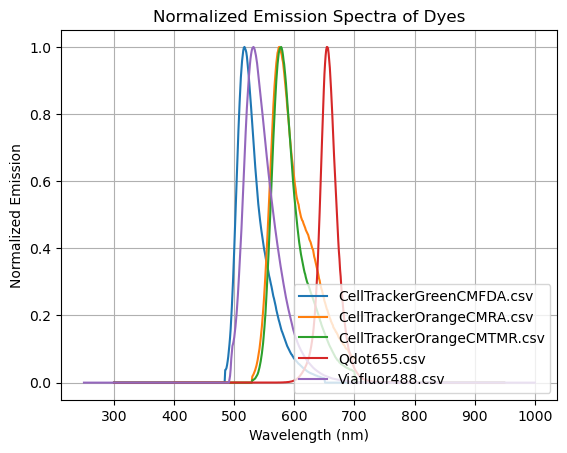

,Dye,Wavelengths,Emissions
0,CellTrackerGreenCMFDA.csv,"[300, 301, 302, 303, 304, 305, 306, 307, 308, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,CellTrackerOrangeCMRA.csv,"[400, 401, 402, 403, 404, 405, 406, 407, 408, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,CellTrackerOrangeCMTMR.csv,"[300, 301, 302, 303, 304, 305, 306, 307, 308, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Qdot655.csv,"[300, 301, 302, 303, 304, 305, 306, 307, 308, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Viafluor488.csv,"[250, 251, 252, 253, 254, 255, 256, 257, 258, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [2]:
# Re-creating the combined_spectra_df (since it is not defined) and renaming it to gt_dyes_df

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the data folder
datafolder = '/mnt/neerja-DATA/SDCData/cell_dye_spectrum'

# Get the list of CSV files in the directory
files = os.listdir(datafolder)
files.sort()  # Sort the files in alphabetical order

# Initialize an empty list to store the data
combined_data = []

for f in files:
    if f.endswith('.csv'):  # Ensure only CSV files are processed
        print(f)
        
        # Read each CSV file into a pandas DataFrame
        file_path = os.path.join(datafolder, f)
        df = pd.read_csv(file_path)
        
        # Normalize the 'Emission' spectrum column (assuming it exists)
        df['Normalized Emission'] = df['Emission'] / np.max(df['Emission'])
        
        # Add a new row for each file, storing the wavelength and emission arrays
        combined_data.append({
            'Dye': f,  # The file name (dye) as identifier
            'Wavelengths': np.array(df['Wavelength']),  # Store all wavelengths as a NumPy array
            'Emissions': np.array(df['Normalized Emission'])  # Store all emissions as a NumPy array
        })
        
        # Plot each spectrum
        plt.plot(df['Wavelength'], df['Normalized Emission'], label=f)

# Convert the combined data list into a DataFrame
gt_dyes_df = pd.DataFrame(combined_data)

# Customize the plot
plt.title('Normalized Emission Spectra of Dyes')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Emission')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Display the renamed dataframe (gt_dyes_df) where each row represents a dye and contains the wavelength and emission arrays
gt_dyes_df


## HUVEC patterned sample

### System parameters

In [3]:
wvmax= 700
wvmin= 450
wvstep= 8
downsample_factor = 2
wavelengths = np.arange(wvmin,wvmax+wvstep,wvstep)

mag_size = 10*9/39 # 10x followed by diffuser
spectral_camera_pixel_size = 2.4 # um
recon_pixel_size = spectral_camera_pixel_size*downsample_factor # 2x2 downsampling
gt_pixel_size = 1.25 # um #TODO: check this
gt_mag_size = 10*0.38 # 10x followed by 0.38x tube lens
superpixel_size = 160 # um


### plot recon and gt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3017417959633544].


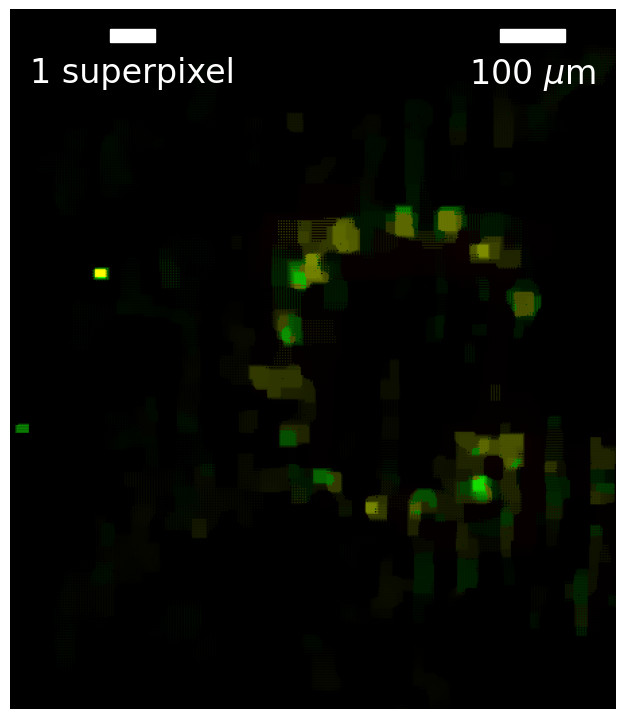

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.4209279241225041].


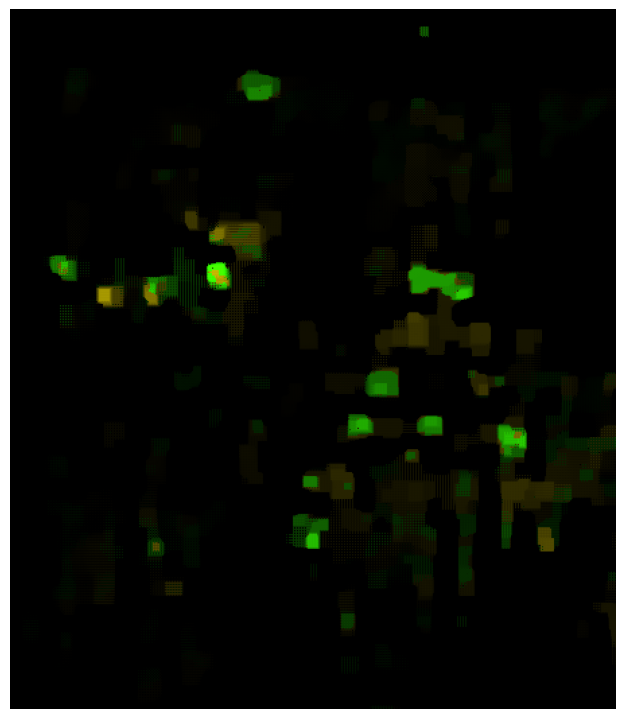

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3518380456333536].


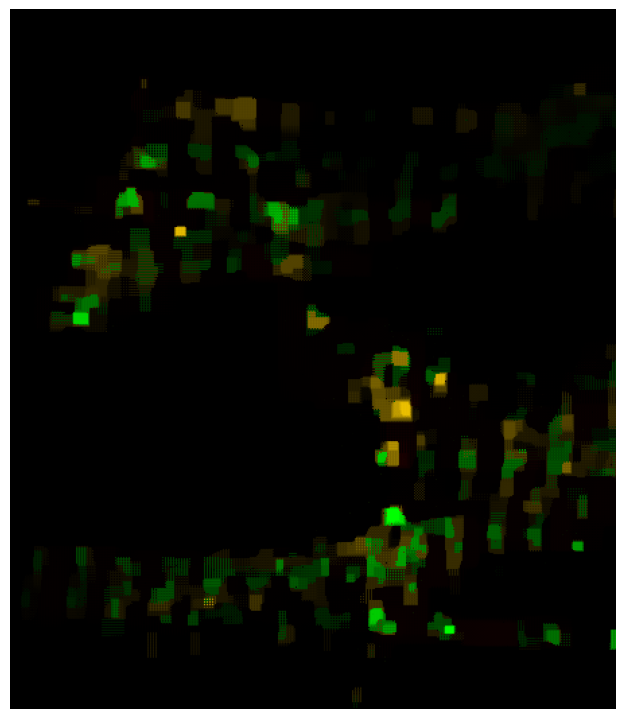

In [4]:
datafolder = '../Results/PaperResults'
files = ['huvec_CAL_10x_left_LRhot_5xfp75m0.pkl',
    'huvec_CAL_10x_LRhot_zdq2kylq.pkl', 
    'huvec_CAL_10x_right_LRhot_rf4b08ie.pkl']

### figure out better subcrop indices thru trial & error
crop_further = [50, 570, 100, 550]

k = 0
for file in files:
    with open(os.path.join(datafolder, file), 'rb') as f:
        xk = np.load(f, allow_pickle=True)['xk']
    xk = sdc.cropci(xk, crop_further)
    HSI_data = np.transpose(xk, (1,2,0))
    HSI_data = np.reshape(HSI_data, [-1,xk.shape[0]])
    false_color = sdc.HSI2RGB(wavelengths, HSI_data ,xk.shape[1],xk.shape[2], 65, False)
    
    # Display the image
    fig, ax = plt.subplots(figsize=(7, 7))
    plt.imshow(false_color**1.8*2)
    plt.axis('off')
    if k == 0: # only add scale bar to first image
        scalebar = drawscalebar(ax,superpixel_size,recon_pixel_size)
        ax.add_artist(scalebar)
        scalebarum = drawscalebar(ax, 100, recon_pixel_size, mag = mag_size, scalebarname='100 $\mu$m', loc = 'upper right')
        ax.add_artist(scalebarum)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()
    k += 1

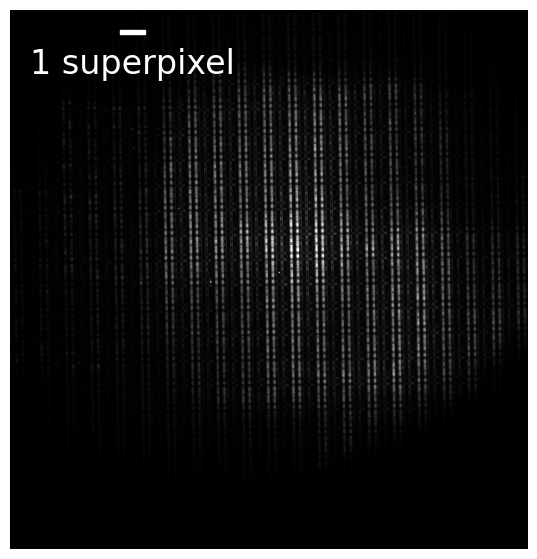

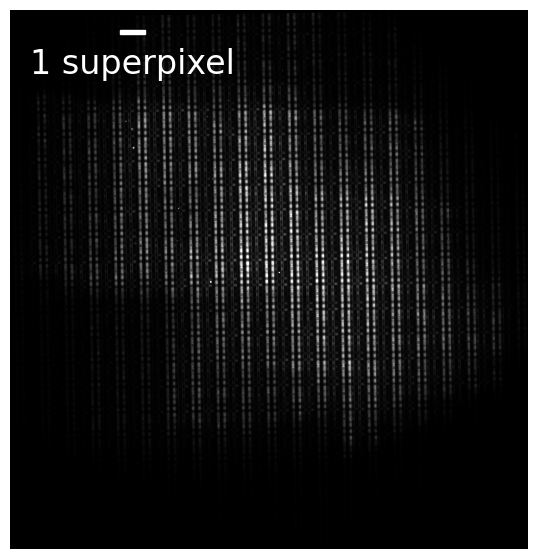

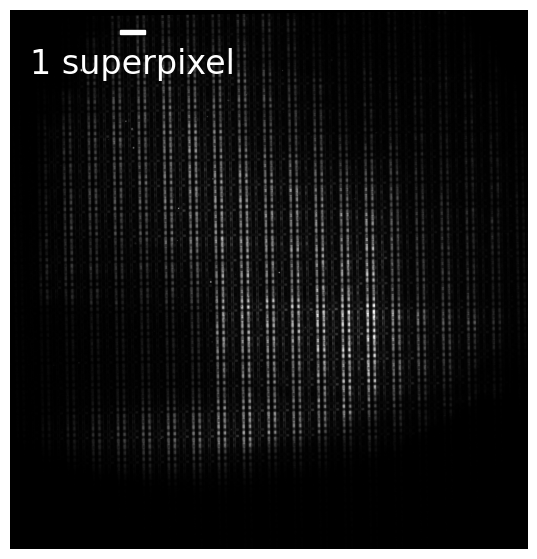

In [5]:
crop_indices = [420,1852,1250,2626] #top bottom left default: [320,1652,1350,2726]
datafolder = [
    '/media/azuldata/neerja/2024-04-22_huvec_patterned/huvec_CAL_10x_left', 
    '/media/azuldata/neerja/2024-04-22_huvec_patterned/huvec_CAL_10x', 
    '/media/azuldata/neerja/2024-04-22_huvec_patterned/huvec_CAL_10x_right']
meas_name = 'meas.tiff'
bg_name = 'bg.tiff'
# crop_further = [50, 570, 100, 550]

for df in datafolder:
    bits = 16
    power = 1
    sample_meas = sdc.importTiff(df,meas_name)/2**bits
    try:
        background = sdc.importTiff(df,bg_name)/2**bits
    except:
        print('No background image found, continuing without background subtraction')
        background = torch.zeros(sample_meas.shape)
    measurement = sdc.cropci((sample_meas-background),crop_indices).clip(0,1)**power
    # measurement = sdc.cropci(measurement, crop_further)
    fig,ax = plt.subplots(figsize = (7,7))

    plt.imshow(measurement, cmap='gray')
    # plt.colorbar()  
    plt.clim([0,.5])
    plt.axis('off')

    scalebar = drawscalebar(ax, superpixel_size,spectral_camera_pixel_size)
    ax.add_artist(scalebar)



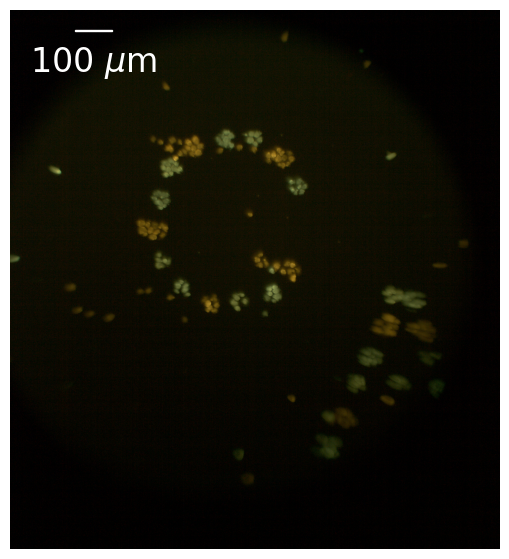

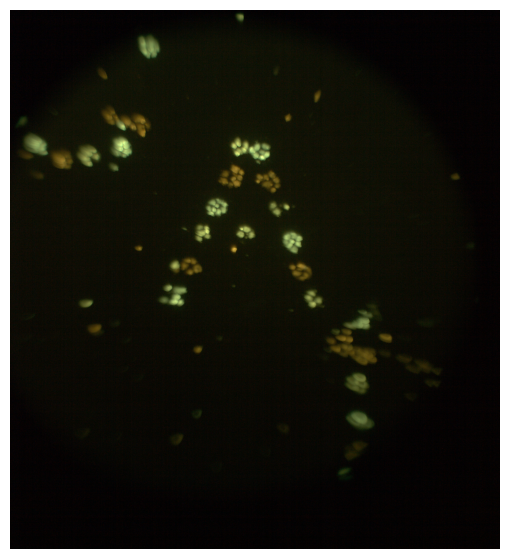

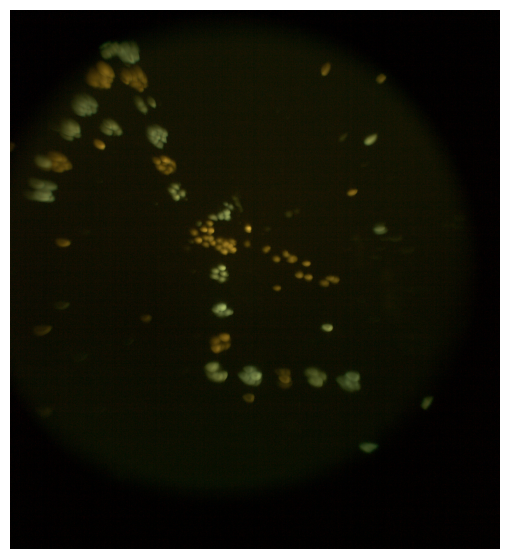

In [6]:
# show gt
import imageio.v2 as imageio
import scipy.ndimage as ndimage
power = 0.8
k = 0
datafolder = [
    '/media/azuldata/neerja/2024-04-22_huvec_patterned/huvec_CAL_10x_left', 
    '/media/azuldata/neerja/2024-04-22_huvec_patterned/huvec_CAL_10x', 
    '/media/azuldata/neerja/2024-04-22_huvec_patterned/huvec_CAL_10x_right']

for df in datafolder: 
    # draw groundtruth
    gt_name = 'gt.tiff'

    # load gt image located in datafolder
    gt = imageio.imread(os.path.join(df, gt_name))

    # Rotate the image without zero-padding
    gt_rot = ndimage.rotate(gt, -90, reshape=True)
    gt_rot = gt_rot / 255.0
    gt_rot = np.clip(gt_rot ** power, 0, 1)
    # Optionally convert back to uint8
    gt_rot = (gt_rot * 255).astype(np.uint8)

    # Display the image
    fig,ax = plt.subplots(figsize = (7,7))
    plt.imshow(gt_rot)
    plt.axis('off')
    if k==0: #Only show scale bar on first image
        scalebar = drawscalebar(ax, 100,gt_pixel_size,mag = gt_mag_size, scalebarname='100 $\mu$m', loc = 'upper left')
        ax.add_artist(scalebar)
    k += 1

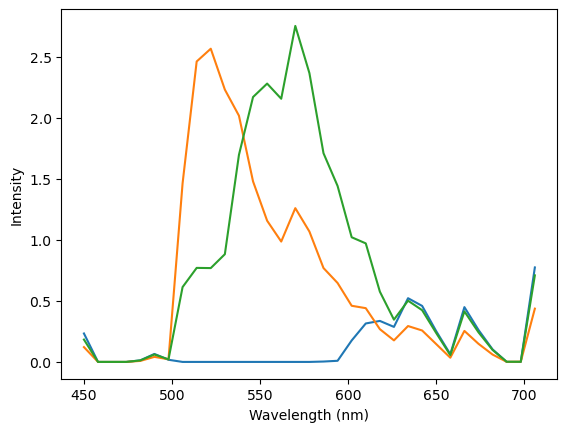

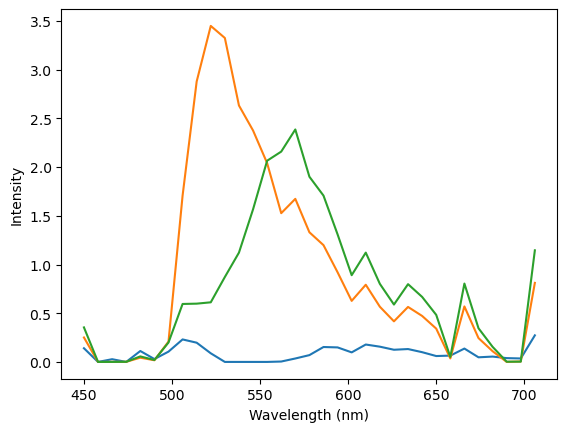

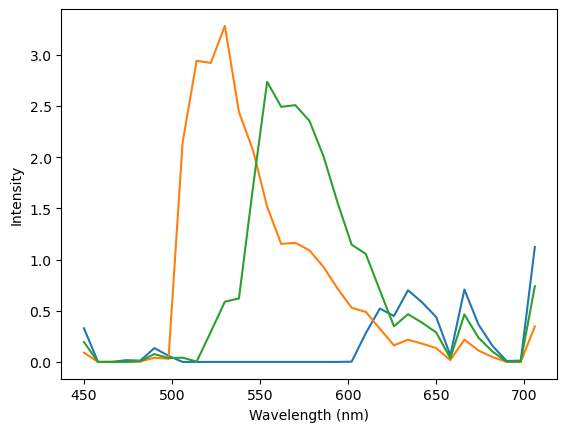

In [7]:
# plot the spectra from the low rank recon
datafolder = '../Results/PaperResults'
files = ['huvec_CAL_10x_left_LRhot_5xfp75m0.pkl',
    'huvec_CAL_10x_LRhot_zdq2kylq.pkl', 
    
    'huvec_CAL_10x_right_LRhot_rf4b08ie.pkl']
spectra_stack = []  # Initialize an empty list to collect the spectra arrays

for file in files:
    with open(os.path.join(datafolder, file), 'rb') as f:
        spectra = np.load(f, allow_pickle=True)['U']
        spectra_stack.append(spectra)  # Append each spectra array to the list
    plt.figure()
    plt.plot(wavelengths,spectra)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
# After the loop, stack the spectra along the first axis (rows)
spectra_stack = np.hstack(spectra_stack)  # You can also use np.concatenate(spectra_stack, axis=0)


(0.0, 1.1)

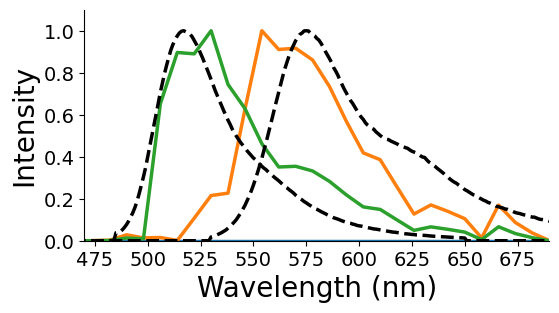

In [8]:
# normalize the spectra
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
spectra = spectra_stack[:,6:9]

# plot the spectra
spectra_norm = np.zeros_like(spectra)
spectra_norm[:,2] = spectra[:,1]/np.max(spectra[1:-1,1])
spectra_norm[:,1] = spectra[:,2]/np.max(spectra[1:-1,2])
# spectra_norm[:,0] = spectra[:,0]
plt.figure(figsize=(6, 3))
plt.plot(wavelengths, spectra_norm, linewidth=2.5)

plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.plot(wavelengths_gt, spectra_gt[:,2],'k',linewidth=2.5)
# Turn off the box
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(gt_dyes_df['Wavelengths'][0], gt_dyes_df['Emissions'][0], 'k--', linewidth=2.5)
plt.plot(gt_dyes_df['Wavelengths'][1], gt_dyes_df['Emissions'][1], 'k--', linewidth=2.5)
# plt.plot(gt_dyes_df['Wavelengths'][3], gt_dyes_df['Emissions'][3], 'k--', linewidth=2.5)
plt.xlim([470, 690])
plt.ylim([0, 1.1])
# add a vertical line at wavelength 576 nm
# plt.axvline(x=565, color='k', linestyle='--', linewidth=2.5)


## USAF Target zero

# decide which data to use